In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np
import time

## Step 1: Set the number of qubits

In [2]:
# Set n as the length of the input bit string
n = 3

## Step 2: Implement Deutsch Jozsa Circuit
### a. Define the deutsch_jozsa function which will generate the Deutsch Jozsa Circuit

In [3]:
def deutsch_jozsa(oracle, n):
    # Circuit has n main qubits and 1 helper qubit, and we measure n main qubits
    qc = QuantumCircuit(n+1, n)
    
    # Gate operations
    # Add x gate to the helper qubit
    qc.x(n)
    # Add H gate to every qubits (0, 1, ... n)
    for i in range(n+1):
        qc.h(i)
    
    # barrier between input state and Uf operation
    qc.barrier()
        
    # Add Uf operation to the current circuit
    qc.append(oracle, range(n+1))
    
    # barrier between Uf operation and measurement
    qc.barrier()
    
    # Add H gate to every qubits (0, 1, ... n-1) again except the helper qubit
    for i in range(n):
        qc.h(i)
        
    # Measure n main qubits
    for i in range(n):
        qc.measure(i, i)
    
    return qc

### b. Generate the gates in Uf opertion for Constant function and Balanced function

In [4]:
# ConstantFunc will generate a Uf operation for a function that always returns 1
def constantFunc(n):
    constant_oracle = QuantumCircuit(n+1)
    
    # Add x gate to the helper qubit
    constant_oracle.x(n)
    
    return constant_oracle

# BalancedFunc will generate a Uf opeartion which includes multiple CNOT gates 
# between every main qubit and the helper qubit
def balancedFunc(n):
    balanced_oracle = QuantumCircuit(n+1)
    
    # Apply a controlled-X gate from each qubits to the helper qubit
    for i in range(n):
        balanced_oracle.cx(i, n)
    
    return balanced_oracle

### c. Display the entire Deutsch Jozsa circuit

In [5]:
# Print out the DJ circuit when the input function is constant
constant_oracle = constantFunc(n)
constant_oracle_gates = constant_oracle.to_gate()
constant_qc = deutsch_jozsa(constant_oracle_gates, n)

print(f"Uf in the circuit of Bernstein Vazirani algorithm (Constant function): ")
print(constant_oracle.draw())
print("Circuit of Deutsch Jozsa algorithm (Constant function): ")
print(constant_qc.draw())

Uf in the circuit of Bernstein Vazirani algorithm (Constant function): 
          
q_0: ─────
          
q_1: ─────
          
q_2: ─────
     ┌───┐
q_3: ┤ X ├
     └───┘
Circuit of Deutsch Jozsa algorithm (Constant function): 
     ┌───┐      ░ ┌──────────────┐ ░ ┌───┐┌─┐      
q_0: ┤ H ├──────░─┤0             ├─░─┤ H ├┤M├──────
     ├───┤      ░ │              │ ░ ├───┤└╥┘┌─┐   
q_1: ┤ H ├──────░─┤1             ├─░─┤ H ├─╫─┤M├───
     ├───┤      ░ │  circuit-152 │ ░ ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├──────░─┤2             ├─░─┤ H ├─╫──╫─┤M├
     ├───┤┌───┐ ░ │              │ ░ └───┘ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░─┤3             ├─░───────╫──╫──╫─
     └───┘└───┘ ░ └──────────────┘ ░       ║  ║  ║ 
c: 3/══════════════════════════════════════╩══╩══╩═
                                           0  1  2 


In [6]:
# Print out the DJ circuit when the input function is balanced
balanced_oracle = balancedFunc(n)
balanced_oracle_gates = balanced_oracle.to_gate()
balanced_qc = deutsch_jozsa(balanced_oracle_gates, n)

print(f"Uf in the circuit of Bernstein Vazirani algorithm (Balanced function): ")
print(balanced_oracle.draw())
print("Circuit of Deutsch Jozsa algorithm (Balanced function): ")
print(balanced_qc.draw())

Uf in the circuit of Bernstein Vazirani algorithm (Balanced function): 
                    
q_0: ──■────────────
       │            
q_1: ──┼────■───────
       │    │       
q_2: ──┼────┼────■──
     ┌─┴─┐┌─┴─┐┌─┴─┐
q_3: ┤ X ├┤ X ├┤ X ├
     └───┘└───┘└───┘
Circuit of Deutsch Jozsa algorithm (Balanced function): 
     ┌───┐      ░ ┌──────────────┐ ░ ┌───┐┌─┐      
q_0: ┤ H ├──────░─┤0             ├─░─┤ H ├┤M├──────
     ├───┤      ░ │              │ ░ ├───┤└╥┘┌─┐   
q_1: ┤ H ├──────░─┤1             ├─░─┤ H ├─╫─┤M├───
     ├───┤      ░ │  circuit-156 │ ░ ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├──────░─┤2             ├─░─┤ H ├─╫──╫─┤M├
     ├───┤┌───┐ ░ │              │ ░ └───┘ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░─┤3             ├─░───────╫──╫──╫─
     └───┘└───┘ ░ └──────────────┘ ░       ║  ║  ║ 
c: 3/══════════════════════════════════════╩══╩══╩═
                                           0  1  2 


## Step 3: Run the program on a simulator
### a. Use the simulator without noise (Local Simulator)

In [7]:
# Simulator without noise (Local Simulator)
# We'll run the program on a simulator
backend = Aer.get_backend('aer_simulator')

{'000': 8192}
Execution time:  0.07540416717529297
The probability of measuring 000 in Constant function is 100.0 %


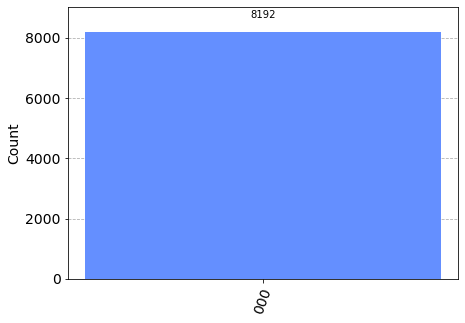

In [8]:
# Constant Function
# Record start time
start = time.time()

constant_qc_trans = transpile(constant_qc, backend)
constant_job = backend.run(constant_qc_trans, shots=8192)
constant_output = constant_job.result().get_counts()

# Record end time
end = time.time()
constant_qc_execute = end - start


# Check the probability of measuring all zero in Constant function
all_zero = '0' * n

if all_zero in constant_output:
    prob_const = (constant_output[all_zero] / 8192.0) * 100
else:
    prob_const = 0.0


print(constant_output)
print("Execution time: ", constant_qc_execute)
print("The probability of measuring " + all_zero + " in Constant function is", prob_const, "%")
plot_histogram(constant_output)

{'111': 8192}
Execution time:  0.030804872512817383
The probability of measuring 000 in Balanced function is 0.0 %


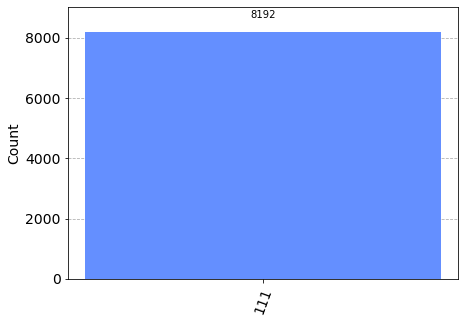

In [9]:
# Balanced Function
# Record start time
start = time.time()

balanced_qc_trans = transpile(balanced_qc, backend)
balanced_job = backend.run(balanced_qc_trans, shots=8192)
balanced_output = balanced_job.result().get_counts()

# Record end time
end = time.time()
balanced_qc_execute = end - start


# Check the probability of measuring all zero in Balanced function
all_zero = '0' * n
if all_zero in balanced_output:
    prob_bal = (balanced_output[all_zero] / 8192.0) * 100
else:
    prob_bal = 0.0


print(balanced_output)
print("Execution time: ", balanced_qc_execute)
print("The probability of measuring " + all_zero + " in Balanced function is", prob_bal, "%")
plot_histogram(balanced_output)

### b. Use on a simulator with noise (Fake Provider Backends)

In [10]:
# Simulator with noise
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakeVigo
provider = FakeVigo()
backend_noise = AerSimulator.from_backend(provider)

{'011': 12, '110': 2, '100': 42, '001': 627, '101': 5, '010': 74, '000': 7430}
Execution time:  0.09056520462036133
The probability of measuring 000 in Constant function is 90.6982421875 %


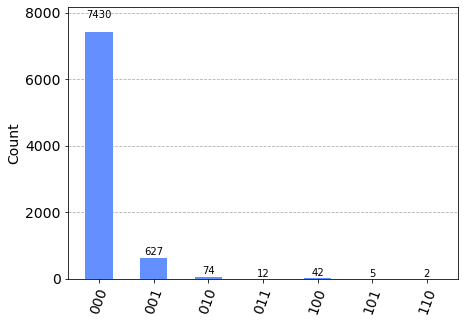

In [11]:
# Run the program on a noisy simulator
# Constant Function
# Record start time
start = time.time()

constant_qc_trans_noise = transpile(constant_qc, backend_noise)
constant_job_noise = backend_noise.run(constant_qc_trans_noise, shots=8192)
constant_output_noise = constant_job_noise.result().get_counts()

# Record end time
end = time.time()
constant_qc_execute_noise = end - start


# Check the probability of measuring all zero in Constant function
all_zero = '0' * n

if all_zero in constant_output_noise:
    prob_const_noise = (constant_output_noise[all_zero] / 8192.0) * 100
else:
    prob_const_noise = 0.0

    
print(constant_output_noise)
print("Execution time: ", constant_qc_execute_noise)
print("The probability of measuring " + all_zero + " in Constant function is", prob_const_noise, "%")
plot_histogram(constant_output_noise)

{'010': 20, '000': 21, '100': 8, '110': 240, '001': 61, '101': 191, '011': 669, '111': 6982}
Execution time:  0.08976101875305176
The probability of measuring 000 in Constant function is 0.25634765625 %


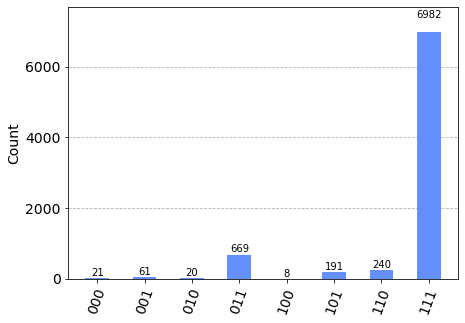

In [12]:
# Run the program on a noisy simulator
# Balanced Function
# Record start time
start = time.time()

balanced_qc_trans_noise = transpile(balanced_qc, backend_noise)
balanced_job_noise = backend_noise.run(balanced_qc_trans_noise, shots=8192)
balanced_output_noise = balanced_job_noise.result().get_counts()

# Record end time
end = time.time()
balanced_qc_execute_noise = end - start


# Check the probability of measuring all zero in Constant function
all_zero = '0' * n

if all_zero in balanced_output_noise:
    prob_bal_noise = (balanced_output_noise[all_zero] / 8192.0) * 100
else:
    prob_bal_noise = 0.0
    
    
print(balanced_output_noise)
print("Execution time: ", balanced_qc_execute_noise)
print("The probability of measuring " + all_zero + " in Constant function is", prob_bal_noise, "%")
plot_histogram(balanced_output_noise)

## Step 4: Present some diagrams that map the number of qubits to execution time

In [13]:
timeList = {}

# The function displayPlot is to calculate the execution time 
# for each number of qubits and for each kind of simulator and store them in timeList
# func: Function to geneate the Uf opeartion
# simulateType: "noise" or "no-noise" simulatior
# title: Title of the dot plot
def displayPlot(func, simulateType, title):
    execute_time = {}
    
    # Check what type of simulator is used
    if (simulateType == "noise"):
        provider = FakeVigo()
        backend = AerSimulator.from_backend(provider)
        qubitRange = range(1, 5)
    if (simulateType == "no-noise"):
        backend = Aer.get_backend('aer_simulator')
        qubitRange = range(1, 28)
    
    for n in qubitRange:
        oracle = func(n)
        qc = deutsch_jozsa(oracle, n)

        # Record start time
        start = time.time()

        qc_trans = transpile(qc, backend)
        job = backend.run(qc_trans, shots=8192)
        output = job.result().get_counts()

        # Record end time
        end = time.time()
        execute = end - start

        execute_time[n] = execute
        
    timeList[title] = execute_time
    
    return

In [14]:
displayPlot(constantFunc, "no-noise", "Execution time for different number of qubits in Constant Function (No noise)")
displayPlot(balancedFunc, "no-noise", "Execution time for different number of qubits in Balanced Function (No noise)")
displayPlot(constantFunc, "noise", "Execution time for different number of qubits in Constant Function (Noise)")
displayPlot(balancedFunc, "noise", "Execution time for different number of qubits in Balanced Function (Noise)")

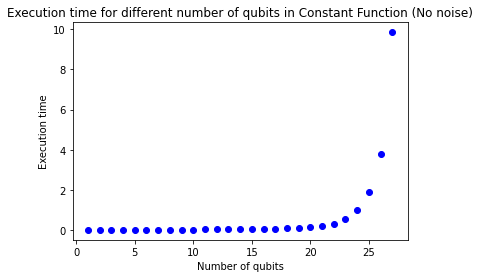

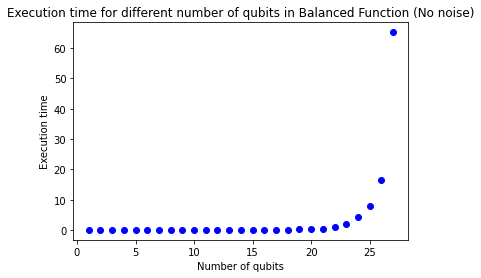

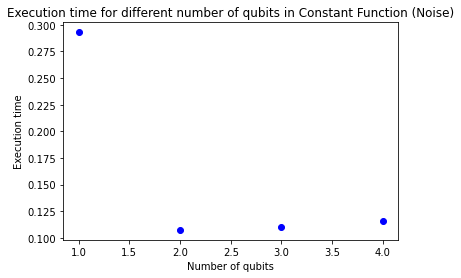

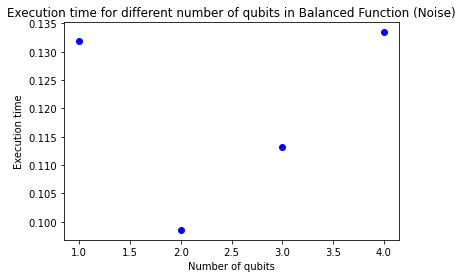

In [15]:
import matplotlib.pyplot as plt

for key in timeList:
    value = timeList[key]
    
    # Extract keys and values from the dictionary
    keys = list(value.keys())
    values = list(value.values())

    # Create a dot plot
    plt.scatter(keys, values, color='blue', marker='o')

    # Add labels and title
    plt.xlabel('Number of qubits')
    plt.ylabel('Execution time')
    plt.title(key)

    # Display the plot
    plt.show()